Febrary, 2016

#AUC CURVE

###IMPORT PACKAGES

Let's import packages used in this notebook:

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

#VISUALIZATION
%matplotlib inline
import matplotlib.pyplot as plt

###IMPORT DATA

The predicted values are stored in a csv file: `y_y_pred.txt`

First column are real values, second column predictec values.

In [2]:
#Use panda to import csv

#ONLY ONE MODEL
df = pd.read_csv('y_y_pred.txt', sep=' ', names=["y","y_pred"])
y_predarray = np.array(df.y_pred)
y_truearray = np.array(df.y)

#MODEL 1
df1 = pd.read_csv('y_y_pred1.txt', sep=' ', names=["y","y_pred"])
y_pred1array = np.array(df1.y_pred)
y_true1array = np.array(df1.y)

#MODEL 2
df2 = pd.read_csv('y_y_pred2.txt', sep=' ', names=["y","y_pred"]) #change csv file name
y_pred2array = np.array(df2.y_pred)
y_true2array = np.array(df2.y)

In [3]:
print df["y"].shape

(136263L,)


### AREA UNDER THE CURVE ROC - PERFORMANCE OF 1 MODEL

Let's visually see the performance of our model using `sklearn.metrics.auc` (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)



####AUC ROC - 1 MODEL

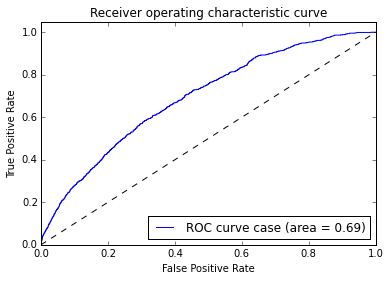

In [4]:
#AUC ROC CURVE - 1 MODEL

#AUC score
fpr, tpr, _ = metrics.roc_curve(y_truearray, y_predarray)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve 
plt.figure()
plt.plot(fpr, tpr, label='ROC curve case (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

####AUC PRC - 1 MODEL

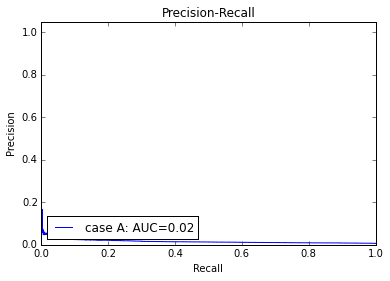

In [5]:
#AUCprc
precision, recall, threshold = metrics.precision_recall_curve(y_truearray, y_predarray)
average_precision = metrics.average_precision_score(y_truearray, y_predarray)

# Plot curve
plt.clf()
plt.plot(recall, precision, label='case A: AUC={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()
          

### AREA UNDER THE CURVE - COMPARING 2 MODELS

Let's visually compare the performance of two using `sklearn.metrics.auc` (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)



####AUC ROC - 2 MODELS

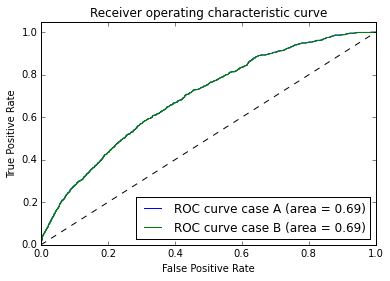

In [6]:
#AUC ROC CURVE - COMPARING 2 MODELS

#AUC score
#a) Model 1
fpr1, tpr1, _ = metrics.roc_curve(y_true1array, y_pred1array)
roc_auc1 = metrics.auc(fpr1, tpr1)

#b) Model 2
fpr2, tpr2, _ = metrics.roc_curve(y_true2array, y_pred2array)
roc_auc2 = metrics.auc(fpr2, tpr2)


# Plot ROC curve 
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve case A (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='ROC curve case B (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

####AUC PRC - 2 MODELS

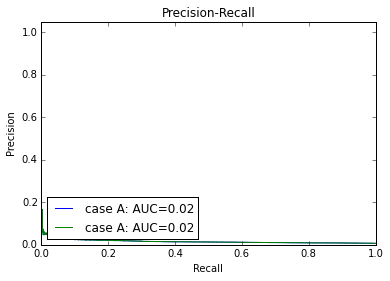

In [7]:
#AUCprc

#a) MODEL 1
precision1, recall1, threshold1 = metrics.precision_recall_curve(y_true1array, y_pred1array)
average_precision1 = metrics.average_precision_score(y_true1array, y_pred1array)

#b) MODEL 2
precision2, recall2, threshold2 = metrics.precision_recall_curve(y_true2array, y_pred2array)
average_precision2 = metrics.average_precision_score(y_true2array, y_pred2array)

# Plot curve
plt.clf()
plt.plot(recall1, precision1, label='case A: AUC={0:0.2f}'.format(average_precision1))
plt.plot(recall2, precision2, label='case A: AUC={0:0.2f}'.format(average_precision2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()
          